## Keras Introduction

Final training loss (MSE): 33.360958099365234
Final training loss (MAE): 5.011083602905273
Final training loss (MAPE): 85.67979431152344
Final training loss (Cosine Similarity): 1.0


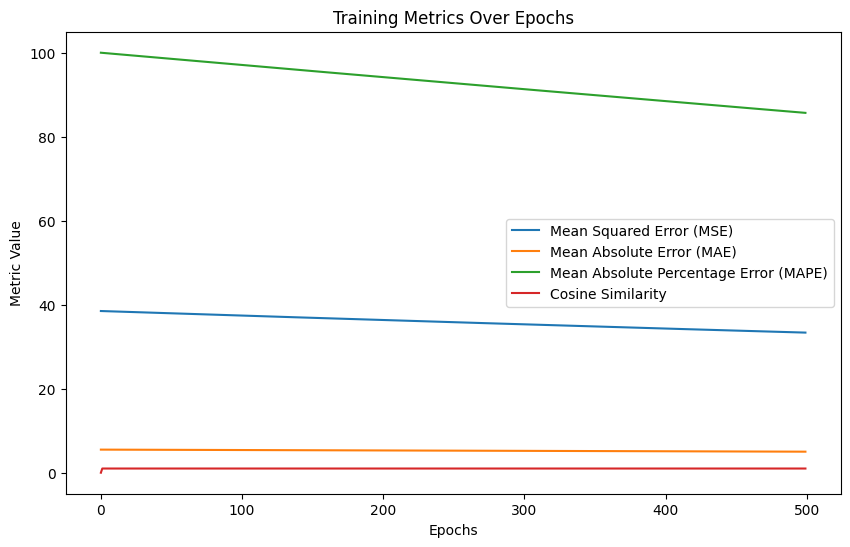

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot as plt

# Prepare sequence
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
X = X.reshape(-1, 1)  # Reshape to (10, 1) for a single feature input

# Create model
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))  # Using ReLU activation
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine_similarity'])

# Train model
history = model.fit(X, X, epochs=500, batch_size=len(X), verbose=0)

# Print metrics to verify learning
print("Final training loss (MSE):", history.history['mse'][-1])
print("Final training loss (MAE):", history.history['mae'][-1])
print("Final training loss (MAPE):", history.history['mape'][-1])
print("Final training loss (Cosine Similarity):", history.history['cosine_similarity'][-1])

# Plot metrics
plt.figure(figsize=(10, 6))
if 'mse' in history.history:
    plt.plot(history.history['mse'], label='Mean Squared Error (MSE)')
if 'mae' in history.history:
    plt.plot(history.history['mae'], label='Mean Absolute Error (MAE)')
if 'mape' in history.history:
    plt.plot(history.history['mape'], label='Mean Absolute Percentage Error (MAPE)')
if 'cosine_similarity' in history.history:
    plt.plot(history.history['cosine_similarity'], label='Cosine Similarity')

plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.title('Training Metrics Over Epochs')
plt.legend()
plt.show()

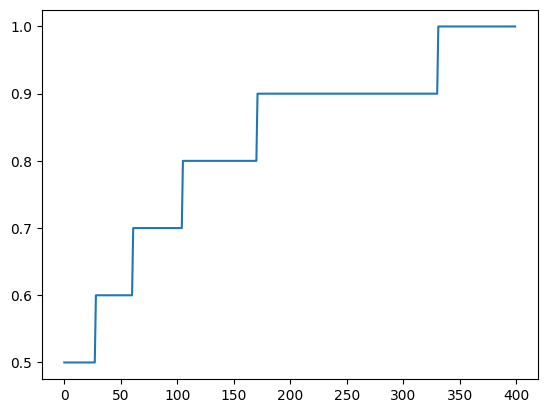

In [4]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

# prepare sequence
X = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
y = array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# create model
model = Sequential()
model.add(Dense(2, input_dim=1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
history = model.fit(X, y, epochs=400, batch_size=len(X), verbose=0)

# plot metrics
pyplot.plot(history.history['accuracy'])
pyplot.show()

In [5]:
# Import the Sequential model and Dense layer
from keras.models import Sequential
from keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Add an input layer and a hidden layer with 10 neurons
model.add(Dense(10, input_shape=(2,), activation="relu"))

# Add a 1-neuron output layer
model.add(Dense(1))

# Summarise your model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np 

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(8, input_dim=2))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

sgd = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd)

model.fit(X, y, batch_size=1, epochs=1000, verbose=0)
print(model.predict(X))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
[[0.00181991]
 [0.99459314]
 [0.9950637 ]
 [0.00676624]]


In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
from tensorflow.keras.utils import to_categorical

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# split into input (X) and output (Y) variables
X = np.array([[0.5, 1, 1], [0.9, 1, 2], [0.8, 0, 1], [0.3, 1, 1], [0.6, 1, 2], [0.4, 0, 1], [0.9, 1, 7], [0.5, 1, 4], [0.1, 0, 1], [0.6, 1, 0], [1, 0, 0]])
y = np.array([[1], [1], [1], [2], [2], [2], [3], [3], [3], [0], [0]])

# Convert labels to categorical one-hot encoding
Y = to_categorical(y, num_classes=4)

# Create model
model = Sequential()
model.add(Dense(3, input_dim=3, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, epochs=700, verbose=0)

# Calculate predictions
predictions = model.predict(X)

# Get the predicted class
predictions_class = predictions.argmax(axis=-1)
print(predictions_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
[1 3 2 1 3 2 3 3 2 1 1]


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

# Create a dataset for the XOR function
x = np.array([
    [0,0],
    [1,0],
    [0,1],
    [1,1]
])

y = np.array([
    0,
    1,
    1,
    0
])

model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x, y, verbose=0, epochs=700)

# Predict
pred = model.predict(x)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
[[0.4044189]
 [0.4044189]
 [0.4044189]
 [0.4044189]]


In [9]:
import numpy as np
import pandas as pd

In [10]:
dataset = pd.read_csv("BankNote_Authentication.csv")
dataset.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [11]:
X = dataset.drop(["class"], axis = 1)
y = dataset.filter(["class"], axis = 1)

In [12]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [13]:
y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=31)

In [15]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
layers.Dense(16,  activation="relu"),
layers.Dense(8, activation="relu"),
layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [16]:
history = model.fit(X_train,
y_train,
epochs=5,
batch_size=16,
validation_data=(X_test, y_test))

Epoch 1/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5785 - loss: 0.6773 - val_accuracy: 0.7913 - val_loss: 0.5073
Epoch 2/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8854 - loss: 0.4366 - val_accuracy: 0.9515 - val_loss: 0.3437
Epoch 3/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9822 - loss: 0.2803 - val_accuracy: 0.9806 - val_loss: 0.2123
Epoch 4/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9923 - loss: 0.1592 - val_accuracy: 0.9854 - val_loss: 0.1264
Epoch 5/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9971 - loss: 0.0937 - val_accuracy: 0.9903 - val_loss: 0.0804


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


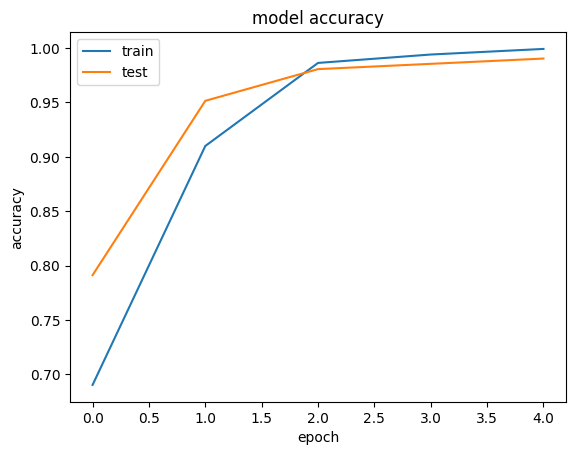

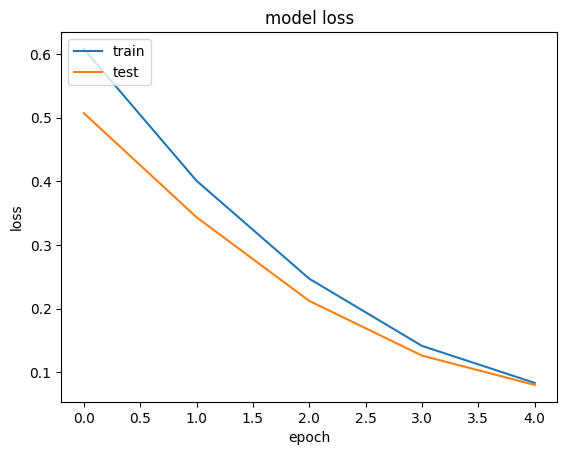

In [17]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()